<a href="https://colab.research.google.com/github/Taweilo/Red_Wine_Quality_Classification_Model/blob/main/Code_Red_Wine_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red Wine Quality Classification / Prediction Project

![Red Wine](https://learn.wineenthusiast.com/wp-content/uploads/2019/09/HeaderImage.svg)

## 1. Business Understanding

This project will follow the BA workflow to tackle red wine business issues using data mining techniques. A red wine retailer import wine and sell it to customers. Thus, it needs to predict the wine quality for the business. Via machine learning technique, we can classify and predict the quality. Evaluating the model performance, we can further make better decisions and thus maximize the profits.

### Importing all the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, normalize
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier


#### Ignore Warning

In [ ]:
import warnings
warnings.simplefilter("ignore")

## 2. Data Understanding

### 2.1 Loading the data
Wine Quality Data: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset?resource=download

In [ ]:
# read csv files
df=pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


### 2.2 Feature Description

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Explanation</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Fixed Acidity</td>
      <td>The amount of non-volatile acids (such as tartaric, malic, and succinic acid). These acids are important for flavor and stability, and can contribute to the wine's tartness or sourness. However, too much acidity can also make the wine taste sour or unbalanced. On the other hand, low levels of fixed acidity can make the wine taste flat or dull</td>
    </tr>
    <tr>
      <td>Volatile Acidity</td>
      <td>Taste measure, sign of winemaking quality. Higher – less control over taste</td>
    </tr>
      <tr>
      <td>Citric Acid</td>
      <td>Not typically present in significant amounts in wine, but it can be added during winemaking to adjust the wine's acidity or enhance its flavor profile. Citric acid can contribute a bright, citrusy note to the wine, which can be desirable in some styles of white wine, rosé, or sparkling wine</td>
    </tr>
      <tr>
      <td>Residual Sugar</td>
      <td>The amount of natural grape sugars that remain in the wine after fermentation is complete</td>
    </tr>
      <tr>
      <td>Chlorides</td>
      <td>The level of chlorides in wine can have an impact on the sensory characteristics of the wine, as well as its overall quality</td>
    </tr>
      <tr>
      <td>Free Sulfur Dioxide</td>
      <td>A type of sulfur dioxide that is present in wine. SO2 is added to wine during the winemaking process to protect the wine from oxidation and microbial spoilage</td>
    </tr>
      <tr>
      <td>Total Sulfur dioxide</td>
      <td>The sum of the free and bound forms of sulfur dioxide that are present in the wine</td>
    </tr>
      <tr>
      <td>density</td>
      <td>Density can be used to determine the alcohol content and sugar content</td>
    </tr>
      <tr>
      <td>pH</td>
      <td>pH is an important parameter that can affect the wine's stability, color, aroma, and taste. A wine with a low pH tends to be more refreshing, and age-worthy, while a wine with a high pH may be flatter, or dull</td>
    </tr>
      <tr>
      <td>Sulphates</td>
      <td>A chemical compound that occurs naturally at low levels during the process of wine fermentation. It is also added by many winemakers during the fermentation stage of winemaking to protect and preserve the wine's character, flavor, and color</td>   
    </tr>
      <tr>
      <td>Alcohol</td>
      <td>The average alcohol content of wine is about 12%</td>   
    </tr>
      <tr>
      <td>Quality</td>
      <td>Scores based on the combination of other features' measurement</td>   
    </tr>
      <tr>
      <td>Id</td>
      <td>The unique number of each row</td>
  </tbody>
</table>

### 2.3 EDA and Vizualization

In [ ]:
# check data type and missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
#check dimension
df.shape

(1143, 13)

In [ ]:
# Descriptive analysis
df.describe().round(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0
mean,8.3,0.5,0.3,2.5,0.1,15.6,45.9,1.0,3.3,0.7,10.4,5.7,805.0
std,1.7,0.2,0.2,1.4,0.0,10.3,32.8,0.0,0.2,0.2,1.1,0.8,464.0
min,4.6,0.1,0.0,0.9,0.0,1.0,6.0,1.0,2.7,0.3,8.4,3.0,0.0
25%,7.1,0.4,0.1,1.9,0.1,7.0,21.0,1.0,3.2,0.6,9.5,5.0,411.0
50%,7.9,0.5,0.2,2.2,0.1,13.0,37.0,1.0,3.3,0.6,10.2,6.0,794.0
75%,9.1,0.6,0.4,2.6,0.1,21.0,61.0,1.0,3.4,0.7,11.1,6.0,1209.5
max,15.9,1.6,1.0,15.5,0.6,68.0,289.0,1.0,4.0,2.0,14.9,8.0,1597.0


In [ ]:
#check target variable
df.quality.value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

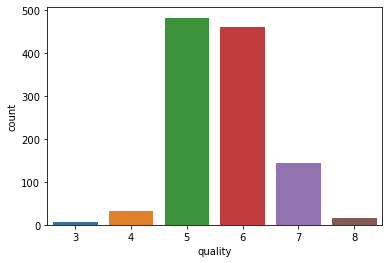

In [ ]:
# Visulize distribution of quality
sns.countplot(data=df, x="quality")

<AxesSubplot:>

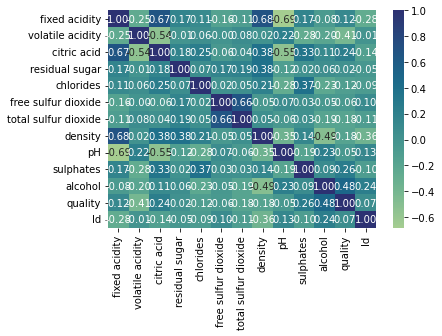

In [ ]:
# Create the heatmap
sns.heatmap(df.corr(), annot=True,fmt='.2f', cmap="crest")

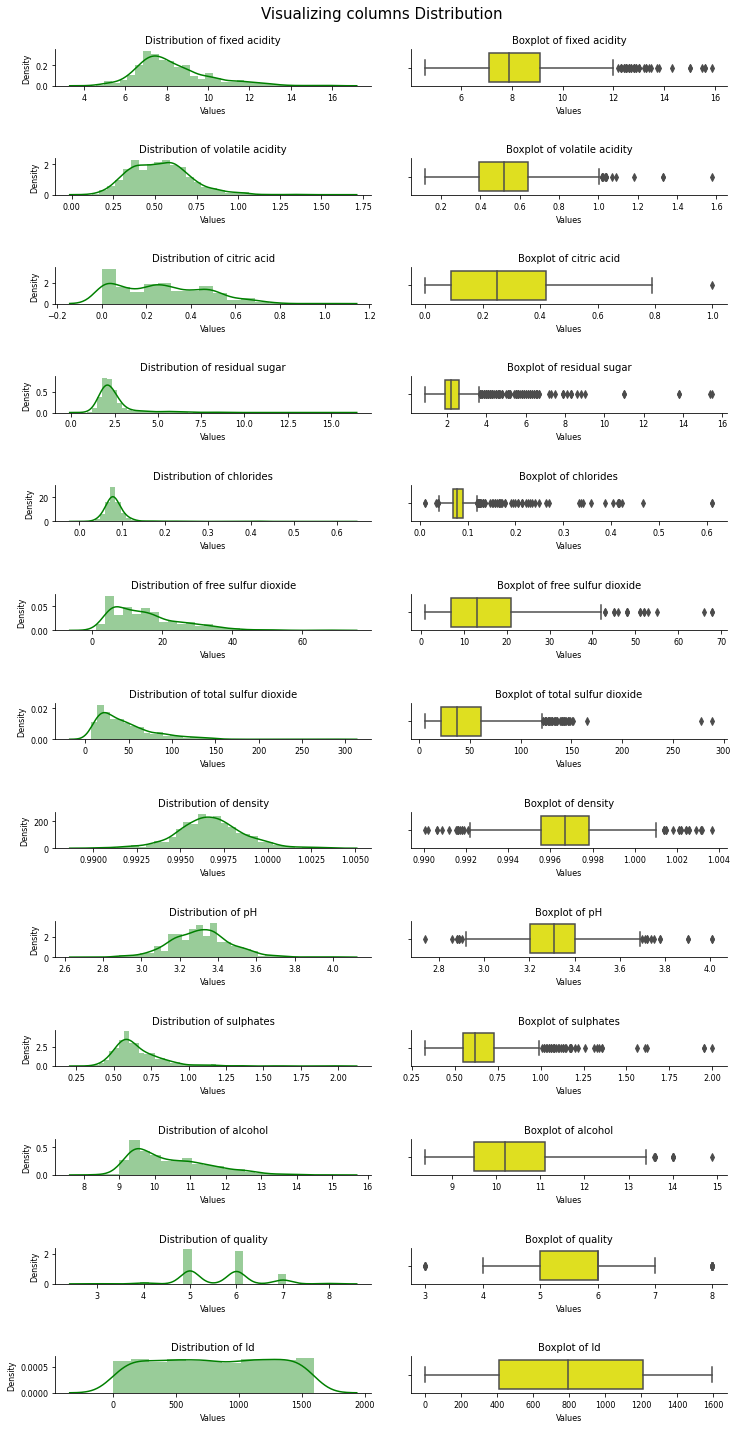

In [ ]:
# Visualizing columns Distribution
# Increase the font size
plt.rcParams.update({'font.size': 8})

fig, ax = plt.subplots(13, 2, figsize=(10, 20))
fig.tight_layout()
fig.subplots_adjust(top=0.95, hspace=2)  # Adjust the hspace parameter for vertical spacing

plt.suptitle("Visualizing columns Distribution", fontsize=15)

for index, i in enumerate(df.columns):
    sns.distplot(df[i], ax=ax[index, 0], color='green')
    sns.boxplot(df[i], ax=ax[index, 1], color='yellow')

    # Set font size for titles and labels
    ax[index, 0].set_title(f'Distribution of {i}', fontsize=10)
    ax[index, 1].set_title(f'Boxplot of {i}', fontsize=10)
    ax[index, 0].set_xlabel('Values', fontsize=8)
    ax[index, 0].set_ylabel('Density', fontsize=8)
    ax[index, 1].set_xlabel('Values', fontsize=8)

    # Remove unnecessary spines
    ax[index, 0].spines['top'].set_visible(False)
    ax[index, 0].spines['right'].set_visible(False)
    ax[index, 1].spines['top'].set_visible(False)
    ax[index, 1].spines['right'].set_visible(False)

plt.show()

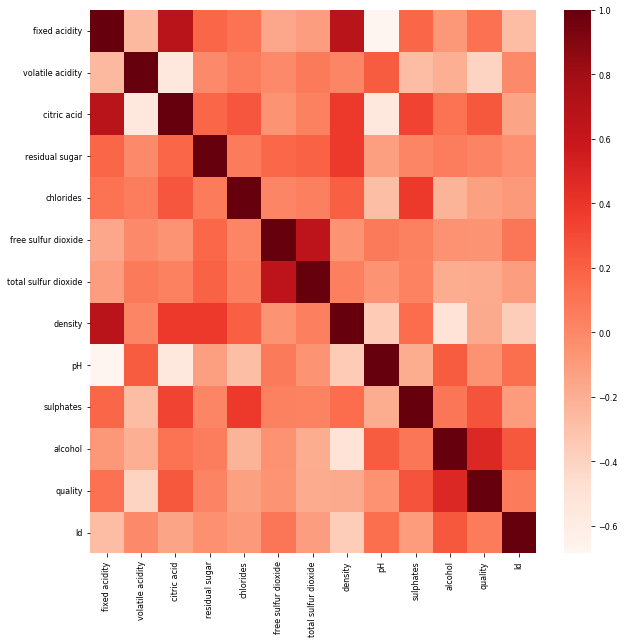

In [ ]:
# Create the correlation matrix
corr = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap="Reds")
plt.show()

## 3. Data Preparation
### 3.1 Label quality as High or low and set limits

In [ ]:
# Define the quality score threshold: 6.5
threshold =6.5
# Convert the quality score to binary
# Over 6.5 is high quality
# 1 represents high quality, 0 represents low quality
df['quality_score'] = np.where(df['quality'] > threshold, 1, 0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,quality_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4,0


In [ ]:
from sklearn.model_selection import train_test_split
# Create X, Y
y = df['quality_score'] # define Y
X = df.drop(['quality', 'Id','quality_score'], axis=1) # define X by dropping irrelevent features
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


### 3.2 Split the data for train and test

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 42) # split data 60% for training

## 4. Modeling

### 4.1 SVM Classification

In [ ]:
# fit SVM with linear kernel
svc_model = SVC(kernel='linear', probability=True)
svc_model.fit(X_train, y_train)

# evaluate in the test data
y_pred=svc_model.predict(X_test)
svc_accuracy= round(accuracy_score(y_test, y_pred), 3)

print("Out-of-sample accuracy of SVM: ",svc_accuracy) # proportion of correctly classified

Out-of-sample accuracy of SVM:  0.867


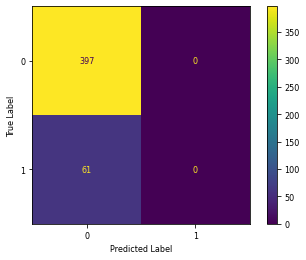

In [ ]:
svc_cm = confusion_matrix(y_test, y_pred, labels=svc_model.classes_)
# Create a ConfusionMatrixDisplay object and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=svc_cm, display_labels=svc_model.classes_)
disp.plot()
# Add axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

In [ ]:
# Confusion matrix values
TP = svc_cm[1, 1]
FP = svc_cm[0, 1]
TN = svc_cm[0, 0]
FN = svc_cm[1, 0]

# Calculate true positive rate (TPR) and false positive rate (FPR)
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

print("True Positive Rate:", TPR)
print("False Positive Rate:", FPR)

True Positive Rate: 0.0
False Positive Rate: 0.0


In [ ]:
# calculate AUC
svc_auc =round(roc_auc_score(y_test, y_pred), 3)
print('AUC:', svc_auc)

AUC: 0.5


In [ ]:
costbenefit_mat = np.array([[10, -40], [100,50]])
svc_profits = sum(sum(svc_cm * costbenefit_mat))
svc_profits

10070

### 4.2 Logistic Regression

In [ ]:
model = LogisticRegression(random_state=0).fit(X_train, y_train)
# Get out-of-sample prediction performance
y_pred_test=model.predict(X_test)
logit_accuracy= round(accuracy_score(y_test, y_pred), 3)
print("Out-of-sample accuracy of Logistic Regression :", logit_accuracy)

Out-of-sample accuracy of Logistic Regression : 0.867


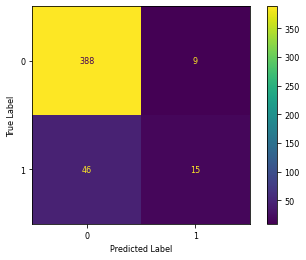

In [ ]:
# Get the predictions of the logistic regression model on the test set
y_pred = model.predict(X_test)

# Calculate the confusion matrix
logit_cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Create a ConfusionMatrixDisplay object and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=logit_cm, display_labels=model.classes_)
disp.plot()
# Add axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

In [ ]:
# Confusion matrix values
TP = logit_cm[1, 1]
FP = logit_cm[0, 1]
TN = logit_cm[0, 0]
FN = logit_cm[1, 0]

# Calculate true positive rate (TPR) and false positive rate (FPR)
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

print("True Positive Rate:", TPR)
print("False Positive Rate:", FPR)

True Positive Rate: 0.2459016393442623
False Positive Rate: 0.022670025188916875


In [ ]:
# calculate AUC
logit_auc =  round(roc_auc_score(y_test, y_pred), 3)
print('AUC:', logit_auc)

AUC: 0.612


In [ ]:
costbenefit_mat = np.array([[10, -40], [100,50]])
logit_profits = sum(sum(logit_cm * costbenefit_mat))
logit_profits

8870

### 4.3 KKN Classification

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)

# make predictions on the test set
y_pred = knn_model.predict(X_test)

# calculate the plain accuracy
knn_accuracy_5 = round(accuracy_score(y_test, y_pred), 3)
print("Out-of-sample accuracy of KNN: ", knn_accuracy_5)

Out-of-sample accuracy of KNN:  0.867


In [ ]:
# define the range of k values to test
k_range = range(1, 26, 2)
k_scores = []

# loop over k values and compute cross-validation scores
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(np.mean(scores))

# find the optimal k value
optimal_k = k_range[np.argmax(k_scores)]
print("Optimal k:", optimal_k)

# fit the model to the full training data and evaluate on the test data
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accuracy = round(accuracy_score(y_test, y_pred),3)
print("Out-of-sample Accuracy:", knn_accuracy)

Optimal k: 9
Out-of-sample Accuracy: 0.865


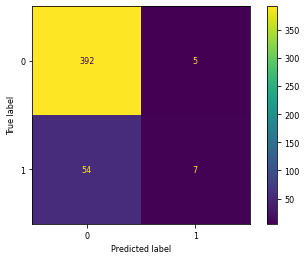

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train, y_train)
# make predictions on the test set
y_pred_knn = knn_model.predict(X_test)
knn_cm = confusion_matrix(y_test, y_pred_knn, labels=knn_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=knn_model.classes_)
disp.plot()
plt.show()

In [ ]:
# calculate AUC
knn_auc = round(roc_auc_score(y_test, y_pred_knn),3)
print('AUC:', knn_auc)

AUC: 0.551


In [ ]:
# Confusion matrix values
TP = knn_cm[1, 1]
FP = knn_cm[0, 1]
TN = knn_cm[0, 0]
FN = knn_cm[1, 0]

# Calculate true positive rate (TPR) and false positive rate (FPR)
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

print("True Positive Rate:", TPR)
print("False Positive Rate:", FPR)

True Positive Rate: 0.11475409836065574
False Positive Rate: 0.012594458438287154


In [ ]:
costbenefit_mat = np.array([[10, -40], [100,50]])
knn_profits = sum(sum(knn_cm * costbenefit_mat))
knn_profits

9470

### 4.4 Decision Tree

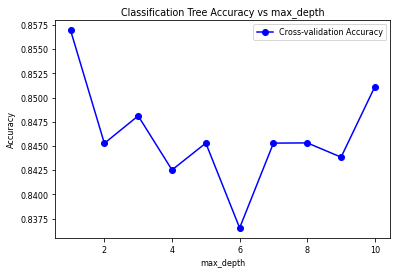


The best model has max_depth=1 with a cross-validation accuracy of 0.8569479965899403.


In [ ]:
# use cv=10 to find the best max depth
# create list to store the accuracies for each value of max_depth
accuracies = []
max_depth = range(1, 11)

# fit classification tree and evaluate using cross-validation for max_depth from 1 to 10
for i in range(1, 11):
    dtc_i = DecisionTreeClassifier(max_depth=i, random_state=0, criterion="entropy")
    # perform 5-fold cross-validation and get the mean accuracy score
    cv_accuracy = cross_val_score(dtc_i, X_train, y_train, cv=10, scoring='accuracy').mean()
    accuracies.append(cv_accuracy)

plt.plot(max_depth, accuracies, 'bo-', label='Cross-validation Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Classification Tree Accuracy vs max_depth')
plt.legend()
plt.show()

# find the index of the model with the highest accuracy
best_model_idx = accuracies.index(max(accuracies))
best_accuracy = accuracies[best_model_idx]

print(f"\nThe best model has max_depth={best_model_idx+1} with a cross-validation accuracy of {best_accuracy}.")

In [ ]:
dtc = DecisionTreeClassifier(max_depth=3,criterion='entropy') # default setting: criterion='gini'
dtc_model=dtc.fit(X_train,y_train)

# evaluate in the test data
y_pred=dtc_model.predict(X_test)
dtc_accuracy=round(accuracy_score(y_test, y_pred),3)
print("Out-of-sample accuracy of decision tree: ",dtc_accuracy) # proportion of correctly classified

Out-of-sample accuracy of decision tree:  0.876


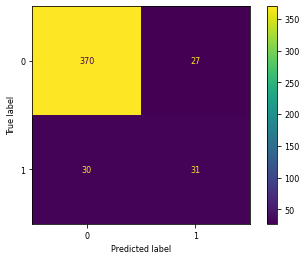

In [ ]:
y_pred = dtc_model.predict(X_test)
dtc_cm = confusion_matrix(y_test, y_pred, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=dtc_cm, display_labels=dtc.classes_)
disp.plot()
plt.show()

In [ ]:
# calculate AUC
dtc_auc = round(roc_auc_score(y_test, y_pred),3)
print('AUC:', dtc_auc)

AUC: 0.72


In [ ]:
# Confusion matrix values
TP = dtc_cm[1, 1]
FP = dtc_cm[0, 1]
TN = dtc_cm[0, 0]
FN = dtc_cm[1, 0]

# Calculate true positive rate (TPR) and false positive rate (FPR)
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

print("True Positive Rate:", TPR)
print("False Positive Rate:", FPR)

True Positive Rate: 0.5081967213114754
False Positive Rate: 0.06801007556675064


In [ ]:
costbenefit_mat = np.array([[10, -40], [100,50]])
dtc_profits = sum(sum(dtc_cm * costbenefit_mat))
dtc_profits

7170

### 4.5 Random Forest Classification

In [ ]:
# random forest
# create a random forestClassifier with an decision tree as the base estimator
rfc = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=42)

# fit the model to the training data
rfc.fit(X_train, y_train)

# make predictions on the test data
y_pred = rfc.predict(X_test)

# evaluate the model's accuracy
rfc_accuracy = accuracy_score(y_test, y_pred)
print("Out-of-sample Accuracy of Random Forest: ", rfc_accuracy)

Out-of-sample Accuracy of Random Forest:  0.8864628820960698


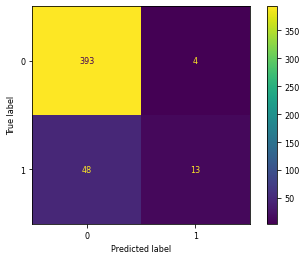

In [ ]:
y_pred = rfc.predict(X_test)
rfc_cm = confusion_matrix(y_test, y_pred, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=rfc_cm, display_labels=rfc.classes_)
disp.plot()
plt.show()

In [ ]:
# calculate AUC
rfc_auc = round(roc_auc_score(y_test, y_pred),3)
print('AUC:', rfc_auc)

AUC: 0.602


In [ ]:
# Confusion matrix values
TP = rfc_cm[1, 1]
FP = rfc_cm[0, 1]
TN = rfc_cm[0, 0]
FN = rfc_cm[1, 0]

# Calculate true positive rate (TPR) and false positive rate (FPR)
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

print("True Positive Rate:", TPR)
print("False Positive Rate:", FPR)

True Positive Rate: 0.21311475409836064
False Positive Rate: 0.010075566750629723


In [ ]:
costbenefit_mat = np.array([[10, -40], [100,50]])
rfc_profits = sum(sum(rfc_cm * costbenefit_mat))
rfc_profits

9220

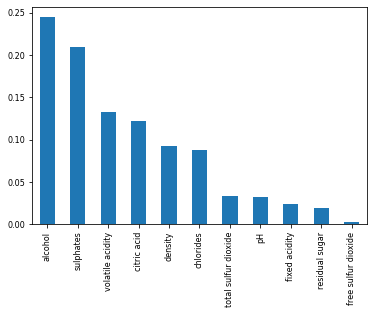

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

### 4.6 Hyperparameter tuning for RF classification

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['sqrt', 'log2',None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfc = RandomForestClassifier()

# Random search of parameters, using 10 fold cross validation,
# search across 100 different combinations, and use all available cores
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rfc_random.fit(scale(X_train), y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rfc_random.best_params_

{'n_estimators': 944,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

{'n_estimators': 522,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 20,
 'bootstrap': False}

In [ ]:
best_rd = rfc_random.best_estimator_

In [ ]:
y_pred=best_rd.predict(scale(X_test.values))

In [ ]:
rfca_accuracy = round(accuracy_score(y_test, y_pred),3)

print("Out-of-sample Accuracy of Random Forest: ", rfca_accuracy)

Out-of-sample Accuracy of Random Forest:  0.9


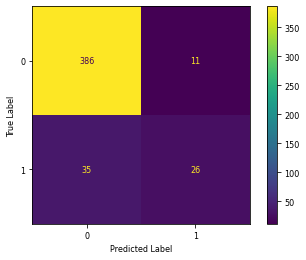

In [ ]:
y_pred =best_rd.predict(scale(X_test.values))
rfca_cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=rfca_cm)
disp.plot()

# Add axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
#plt.title('Confusion Matrix for RandomForestClassifier Model')

# Show the plot
plt.show()

In [ ]:
# Confusion matrix values
TP = rfca_cm[1, 1]
FP = rfca_cm[0, 1]
TN = rfca_cm[0, 0]
FN = rfca_cm[1, 0]

# Calculate true positive rate (TPR) and false positive rate (FPR)
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

print("True Positive Rate:", TPR)
print("False Positive Rate:", FPR)

True Positive Rate: 0.4262295081967213
False Positive Rate: 0.027707808564231738


In [ ]:
# calculate AUC
rfca_auc = round(roc_auc_score(y_test, y_pred),3)
print('AUC:', rfca_auc)

AUC: 0.699


In [ ]:
costbenefit_mat = np.array([[10, -40], [100,50]])
[[tn, fp], [fn, tp]] = rfca_cm
confusion_mat = np.array([[tp, fp], [fn, tn]])
rfca_profits = sum(sum(rfca_cm * costbenefit_mat))
rfca_profits

8220

### 4.7 Adaboost classification

In [ ]:
# Create a Decision Tree model as the base estimator
base_model = DecisionTreeClassifier()

# Create an AdaBoost classifier with the Decision Tree model as the base estimator
adaboost_model = AdaBoostClassifier(base_estimator=base_model)

# Fit the Adaboost classifier to the training data
adaboost_model.fit(X_train, y_train)

# Evaluate on the test data
y_pred = adaboost_model.predict(X_test)
adaboost_accuracy = round(accuracy_score(y_test, y_pred), 3)

print("Out-of-sample accuracy of Adaboost: ", adaboost_accuracy)

Out-of-sample accuracy of Adaboost:  0.876


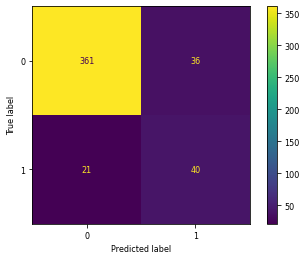

In [ ]:
# Create and display the confusion matrix
adaboost_cm  = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=adaboost_cm, display_labels=adaboost_model.classes_)
disp.plot()
plt.show()

In [ ]:
# Confusion matrix values
TP = adaboost_cm[1, 1]
FP = adaboost_cm[0, 1]
TN = adaboost_cm[0, 0]
FN = adaboost_cm[1, 0]

# Calculate true positive rate (TPR) and false positive rate (FPR)
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

print("True Positive Rate:", TPR)
print("False Positive Rate:", FPR)

True Positive Rate: 0.6557377049180327
False Positive Rate: 0.0906801007556675


In [ ]:
# calculate AUC
adaboost_auc = round(roc_auc_score(y_test, y_pred),3)
print('AUC:', adaboost_auc)

AUC: 0.783


In [ ]:
costbenefit_mat = np.array([[10, -40], [100,50]])
[[tn, fp], [fn, tp]] = adaboost_cm
confusion_mat = np.array([[tp, fp], [fn, tn]])
adaboost_profits = sum(sum(adaboost_cm * costbenefit_mat))
adaboost_profits

6270

## Define business profit for each cell:

Before the machine learning model, we can only buy wine at a fixed price for 75 for all wine.
With improved method, we can use prediction to import high qulaity wine as 100, and low quality 50.
Also, we sell wine as 150 for good wine but 60 for bad wine.

For each type of wine predicted, we have the profits as below:
    
    TP = 150-100=50
    FP = 60-100=-40
    TN = 60-50=10
    FN = 150-50=100

In [ ]:
costbenefit_mat = np.array([[10, -40], [100,50]])
knn_cost = sum(sum(knn_cm * costbenefit_mat))

## 5. Evaluation

In [ ]:
# Define data
model_names = ['SVC', 'Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest','Random Forest with tunning ', 'AdaBoost']
accuracy_values = [svc_accuracy, logit_accuracy, knn_accuracy, dtc_accuracy, rfc_accuracy, rfca_accuracy, adaboost_accuracy]
auc_values = [svc_auc, logit_auc, knn_auc, dtc_auc, rfc_auc, rfca_auc, adaboost_auc]
profits_values = [svc_profits, logit_profits, knn_profits, dtc_profits, rfc_profits, rfca_profits, adaboost_profits]
hyperparameters = ['N/A','N/A','k=11','max_depth=3', 'N/A','n_estimators: 944, max_depth: 90', 'N/A']

# Round accuracy values to 3 decimal places using list comprehension
accuracy_values_rounded = [round(x, 3) for x in accuracy_values]
auc_values_rounded = [round(x, 3) for x in auc_values]

# Create table
df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_values_rounded,
    'AUC': auc_values_rounded,
    'Expected Profits': profits_values,
    'Hyperparameters': hyperparameters
})

# Print table
df

,Model,Accuracy,AUC,Expected Profits,Hyperparameters
0,SVC,0.867,0.500,10070,N/A
1,Logistic Regression,0.867,0.612,8870,N/A
2,KNN,0.865,0.551,9470,k=11
3,Decision Tree,0.876,0.720,7170,max_depth=3
4,Random Forest,0.886,0.602,9220,N/A
5,Random Forest with tunning,0.900,0.699,8220,"n_estimators: 944, max_depth: 90"
6,AdaBoost,0.876,0.783,6270,N/A


## 6. Business value considering the class prior

### 6.1 Get Profit Curve of RF with different true positive rate

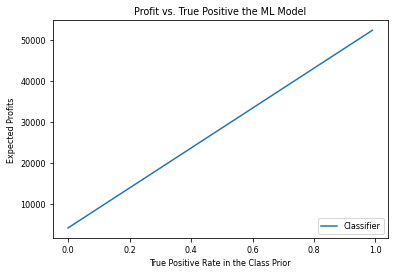

In [ ]:
# expected profits for RF classifier
class_prior_positive_rate = np.arange(0, 1.0, 0.01)
confusion_matrices = []
profits_ml = []
for rate in class_prior_positive_rate:
    tn = (1-rate) * 485 * (397/408) #𝑝(n)× 𝑝(N│n)
    fp = (1-rate) * 485 * (11/408) #𝑝(n)× 𝑝(𝑌│n)
    fn = rate * 485 * (37/40) #𝑝(𝑝)× 𝑝(N│𝑝)
    tp = rate * 485 * (13/40) #𝑝(𝑝)× 𝑝(𝑌│𝑝)
    confusion_matrices.append([[tn, fp], [fn, tp]])

confusion_matrices = np.array(confusion_matrices)
costbenefit_mat = np.array([[10, -40], [100,50]])

for i in range(len(confusion_matrices)):
    profits  = np.sum(confusion_matrices[i] * costbenefit_mat)
    profits_ml .append(profits)

# Plot true positive rate against expected profits
plt.plot(class_prior_positive_rate, profits_ml, label = 'Classifier')
plt.xlabel('True Positive Rate in the Class Prior')
plt.ylabel('Expected Profits')
plt.title('Profit vs. True Positive the ML Model')
plt.legend(loc='lower right')
plt.show()


### 6.2 Get Profit Curve of non-ML model with different true positive rate

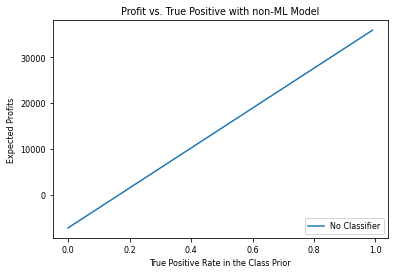

In [ ]:
# expected profits without classifier
class_prior_positive_rate = np.arange(0, 1.0, 0.01)
confusion_matrices = []
profits_nonml = []
for rate in class_prior_positive_rate:
    tn = (1-rate) * 485 #𝑝(n)
    tp = rate * 485    #𝑝(p)
    confusion_matrices.append([[tn, tp]])

confusion_matrices = np.array(confusion_matrices)
costbenefit_mat = np.array([[-15, 75]])

for i in range(len(confusion_matrices)):
    profit = np.sum(confusion_matrices[i] * costbenefit_mat)
    profits_nonml.append(profit)

# Plot true positive rate against expected profits
plt.plot(class_prior_positive_rate, profits_nonml, label = 'No Classifier')
plt.xlabel('True Positive Rate in the Class Prior')
plt.ylabel('Expected Profits')
plt.title('Profit vs. True Positive with non-ML Model')
plt.legend(loc='lower right')
plt.show()

### 6.3 Combined two profits curve above with a reference line

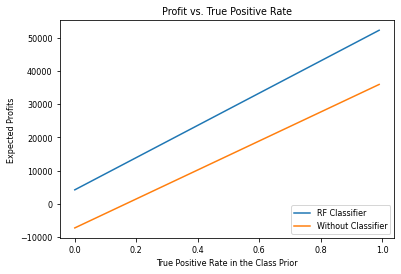

The breakeven point for the two methods is when true positive rate = -2.342
RF Classifier Trend Line: y = 48547.55x + 4196.20
No Classifier Trend Line: y = 43650.00x + -7275.00
x=True Positive Rate in the Class Prior


In [ ]:
# Plot both classifiers in the same graph
plt.plot(class_prior_positive_rate, profits_ml, label = 'RF Classifier')
plt.plot(class_prior_positive_rate, profits_nonml, label = 'Without Classifier')
plt.xlabel('True Positive Rate in the Class Prior')
plt.ylabel('Expected Profits')
plt.title('Profit vs. True Positive Rate')
plt.legend(loc='lower right')
plt.show()


# Define the coefficients for the two regression equations
a = np.polyfit(class_prior_positive_rate, profits_ml, 1)[0]
b = np.polyfit(class_prior_positive_rate, profits_ml, 1)[1]
c = np.polyfit(class_prior_positive_rate, profits_nonml, 1)[0]
d = np.polyfit(class_prior_positive_rate, profits_nonml, 1)[1]

# Define the two regression equations
eq1 = a * class_prior_positive_rate + b #trend line for the RF classifier
eq2 = c * class_prior_positive_rate + d #trend line without the classifier

# Find the value of x for which the two equations are equal
x = (d - b) / (a - c)

print("The breakeven point for the two methods is when true positive rate =", round(x,3))
print(f"RF Classifier Trend Line: y = {a:.2f}x + {b:.2f}")
print(f"No Classifier Trend Line: y = {c:.2f}x + {d:.2f}")
print("x=True Positive Rate in the Class Prior")